In [1]:
from sklearn.externals import joblib
# Load required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import psycopg2
import numpy as np
from sklearn.preprocessing import Imputer

# Set figure display options
%matplotlib inline
sns.set(context='notebook', style='darkgrid')
sns.set(font_scale=1.3)

from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load DataFrames from pickle files
final_df = joblib.load('/Users/shwetapai/Desktop/final_all_features.pkl')
 

In [3]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5938 entries, 0 to 5937
Data columns (total 28 columns):
index                      5938 non-null int64
num_sents                  5922 non-null object
num_words                  5900 non-null object
num_all_caps               5922 non-null object
percent_all_caps           5900 non-null float64
num_exclms                 5922 non-null object
percent_exclms             5900 non-null float64
num_imp_words              5922 non-null object
percent_imp_words          5900 non-null float64
avg_words_per_sent         5902 non-null float64
num_paragraphs             5922 non-null object
avg_sents_per_paragraph    5832 non-null float64
avg_words_per_paragraph    5832 non-null float64
num_images                 5922 non-null object
num_videos                 5922 non-null object
num_youtubes               5922 non-null object
num_hyperlinks             5922 non-null object
num_bolded                 5922 non-null object
percent_bolded          

In [5]:
final_df.isnull().values.any()

True

**Dealing with Missing Values**

In [20]:
# replacing empty cells in the dataframe with Nans

empty_cols=['index', 'num_sents', 'num_words', 'num_all_caps', 'percent_all_caps',
       'num_exclms', 'percent_exclms', 'num_imp_words', 'percent_imp_words',
       'avg_words_per_sent', 'num_paragraphs', 'avg_sents_per_paragraph',
       'avg_words_per_paragraph', 'num_images', 'num_videos', 'num_youtubes',
       'num_hyperlinks', 'num_bolded', 'percent_bolded', 'normalized_text',
       'name', 'category', 'hyperlink', 'currency', 'pledged', 'goal',
       'location', 'funded']
for i in empty_cols:
    final_df[i]=final_df[i].replace(" ",np.nan)


In [22]:
#Dropping Nans
final_df=final_df.dropna()

In [23]:
final_df.shape

(5802, 28)

**Sentiment Analysis**

Creating a new column'sentiment' witht he sentiment of the 'project description'.

In [27]:
#applying sentiment to the 'normalized_text column'
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

def sentiment(x):
    score = sid.polarity_scores(x)
    return score['compound']
    
#sentiment(happy)X
final_df['sentiment']= final_df['normalized_text'].apply(lambda x : sentiment(x))
final_df.head()

,index,num_sents,num_words,num_all_caps,percent_all_caps,num_exclms,percent_exclms,num_imp_words,percent_imp_words,avg_words_per_sent,...,normalized_text,name,category,hyperlink,currency,pledged,goal,location,funded,sentiment
0,2,54.0,1147.0,2.0,0.001744,2.0,0.001744,1.0,0.000872,21.240741,...,It is the numbrst century! Flying cars and tim...,LoadAUF - The Autonomous User Follower,Robots,https://www.kickstarter.com/projects/154469338...,USD,49.0,3000.0,"Miami, FL",False,0.9986
1,3,63.0,1051.0,10.0,0.009515,4.0,0.003806,0.0,0.000000,16.682540,...,"httpaddr Hello, I'm Aryn Sparks, inventor of p...",Project RoBro- The learning raspberry pi brain!,Robots,https://www.kickstarter.com/projects/192623886...,USD,5.5,25000.0,"San Angelo, TX",False,0.9979
2,4,136.0,2146.0,16.0,0.007456,1.0,0.000466,0.0,0.000000,15.779412,...,There are a lot of robots in the world. But mo...,Jerry: An Affordable Personal Robot,Robots,https://www.kickstarter.com/projects/slantrobo...,USD,3290.0,20000.0,"Boise, ID",False,0.9996
3,7,77.0,1006.0,13.0,0.012922,7.0,0.006958,0.0,0.000000,13.064935,...,Omorobot OMOROBOT is a small venture company...,DonkiBot,Robots,https://www.kickstarter.com/projects/235508607...,USD,6835.0,500000.0,"Germantown, MD",False,0.9992
4,8,29.0,636.0,3.0,0.004717,1.0,0.001572,0.0,0.000000,21.931034,...,"Robotics in industry, education, and personal ...",The G.E.N.E.S.I.S. Robotics Platform,Robots,https://www.kickstarter.com/projects/rickrobot...,USD,156.0,50000.0,"Waverly, IA",False,0.9861


In [45]:
##Pickling the final cleaned dataset
joblib.dump(final_df, 'final_full_dataset.pkl')

['final_full_dataset.pkl']

**Exploratory Data Analysis (EDA)**



In [4]:
# Select the meta features
features = [ 'num_sents', 'num_words', 'num_all_caps', 'percent_all_caps',
       'num_exclms', 'percent_exclms', 'num_imp_words', 'percent_imp_words',
       'avg_words_per_sent', 'num_paragraphs', 'avg_sents_per_paragraph',
       'avg_words_per_paragraph', 'num_images', 'num_videos', 'num_youtubes',
       'num_hyperlinks', 'num_bolded', 'percent_bolded','name', 'category', 'hyperlink',
        'currency', 'pledged', 'goal', 'sentiment']


In [29]:
#plotting a heatmap showing correlation for both funded and non-funded projects
corr=final_df[features].corr()


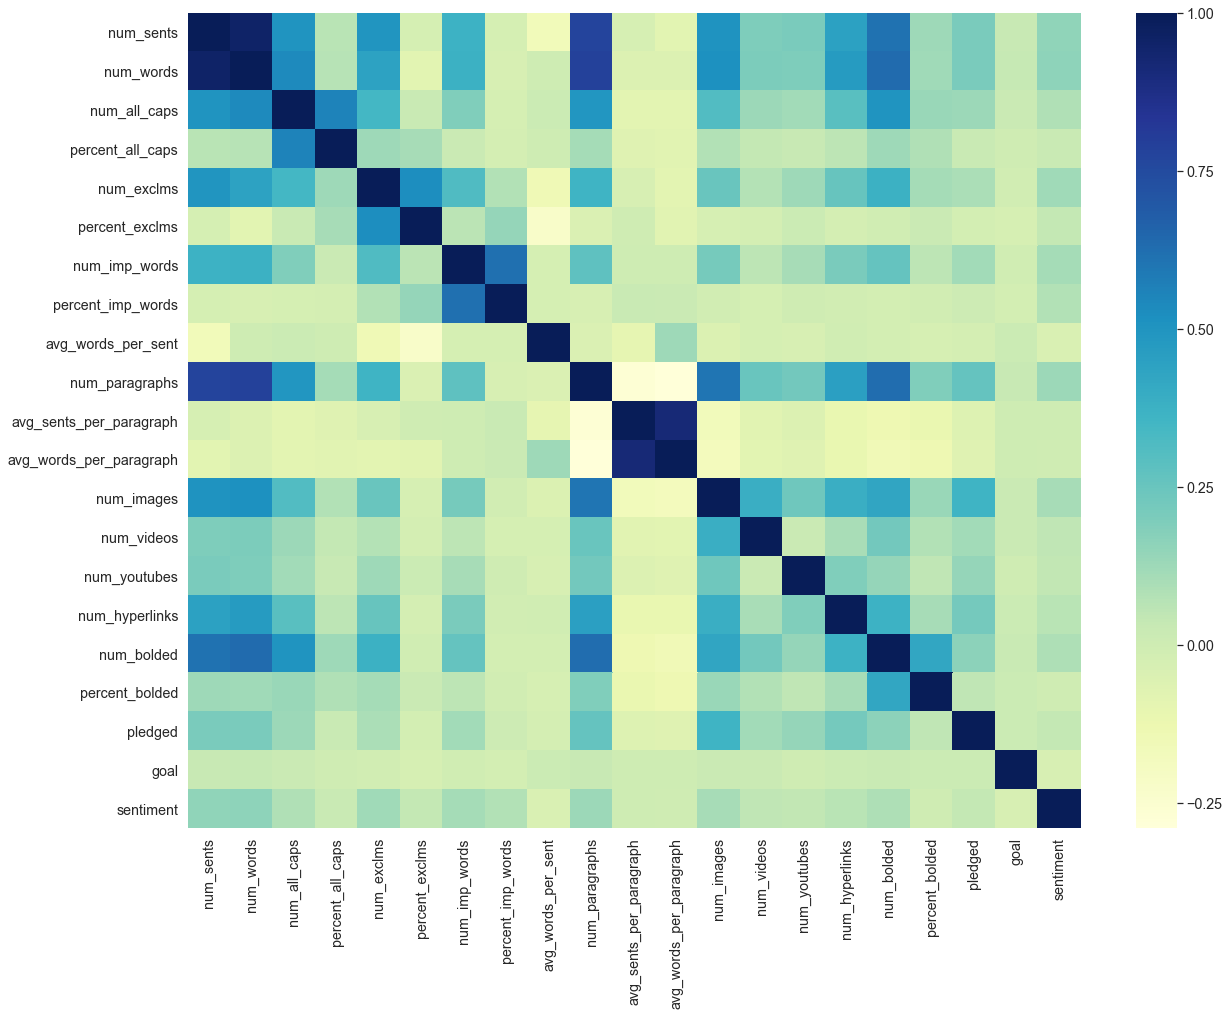

In [31]:
corr_funded=corr.iloc[:,:] 
c1 = corr.abs().unstack()
c1.sort_values(ascending = False)

plt.subplots(figsize=(20,15))
sns.heatmap(corr,annot=False,cmap="YlGnBu")

**Observations**

1.num_sents,num_all_caps, num_paragraphs, and num_words have weak  to moerate positive correlations with other meta features, likely because these meta features estimate the length of a campaign section.

2.num_images is moderately correlated with num_paragraphs, suggesting that creators place images inside paragraph.it is also correlated with num_sents,num_words.

3.num_hyperlinks and num_bolded is also moderately correlated with num_words,num_sents and num_paragraphs.

**Detailed EDA**

Let's look the the correration of all individual features witht the targer variable.

**Variable 'num_sents'**

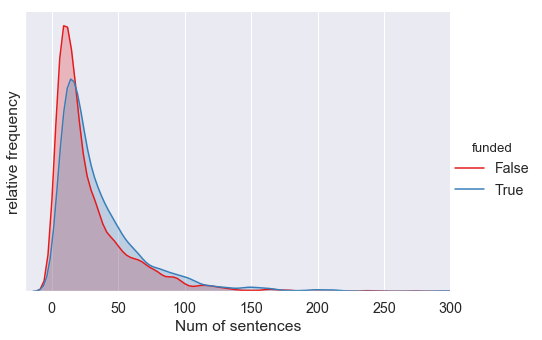

In [33]:
import warnings
warnings.filterwarnings("ignore")

# Setup a FacetGrid object and facet on funded status
fig = sns.FacetGrid(final_df, hue='funded', size=5, palette='Set1', aspect=1.4)

# Plot a kde plot for # of sentences
fig.map(sns.kdeplot, 'num_sents', shade=True).set(xlim=(-20, 300), xlabel='Num of sentences',
        yticks=[],
        ylabel='relative frequency').add_legend()

**Variable 'num_words'**

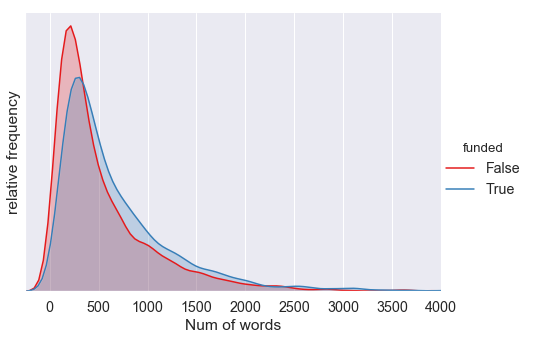

In [34]:
# Setup a FacetGrid object and facet on funded status
fig = sns.FacetGrid(final_df, hue='funded', size=5, palette='Set1', aspect=1.4)

# Plot a kde plot for # of sentences
fig.map(sns.kdeplot, 'num_words', shade=True).set(xlim=(-250, 4000), xlabel='Num of words',
        yticks=[],
        ylabel='relative frequency').add_legend()

**Variable 'num_paragraphs'**

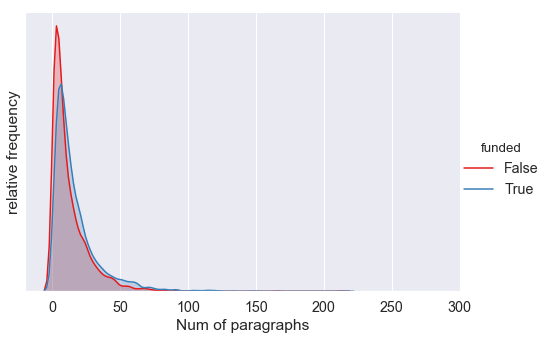

In [35]:
# Setup a FacetGrid object and facet on funded status
fig = sns.FacetGrid(final_df, hue='funded', size=5, palette='Set1', aspect=1.4)

# Plot a kde plot for # of sentences
fig.map(sns.kdeplot, 'num_paragraphs', shade=True).set(xlim=(-20, 300), xlabel='Num of paragraphs',
        yticks=[],
        ylabel='relative frequency').add_legend()

**Varible 'num_all_caps'**

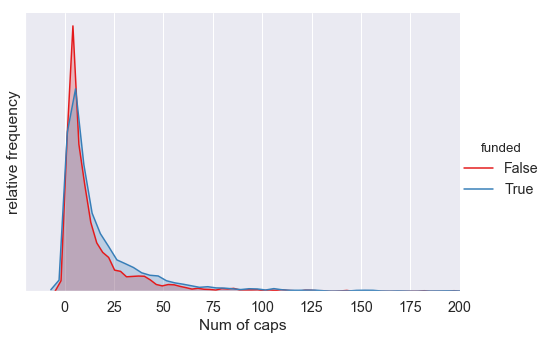

In [36]:
# Setup a FacetGrid object and facet on funded status
fig = sns.FacetGrid(final_df, hue='funded', size=5, palette='Set1', aspect=1.4)

# Plot a kde plot for # of sentences
fig.map(sns.kdeplot, 'num_all_caps', shade=True).set(xlim=(-20, 200), xlabel='Num of caps',
        yticks=[],
        ylabel='relative frequency').add_legend()

**Variable 'num_hyperlinks**

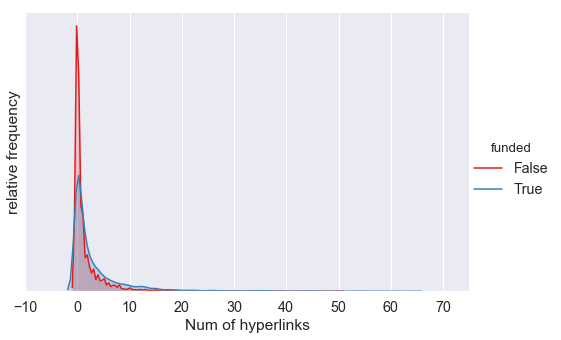

In [37]:
# Setup a FacetGrid object and facet on funded status
fig = sns.FacetGrid(final_df, hue='funded', size=5, palette='Set1', aspect=1.4)

# Plot a kde plot for # of sentences
fig.map(sns.kdeplot, 'num_hyperlinks', shade=True).set(xlim=(-10, 75), xlabel='Num of hyperlinks',
        yticks=[],
        ylabel='relative frequency').add_legend()

**Variable num_images**

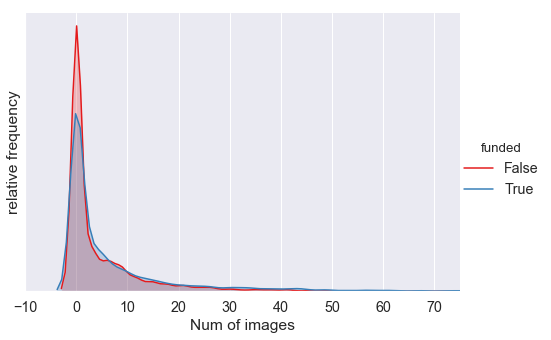

In [38]:
# Setup a FacetGrid object and facet on funded status
fig = sns.FacetGrid(final_df, hue='funded', size=5, palette='Set1', aspect=1.4)

# Plot a kde plot for # of sentences
fig.map(sns.kdeplot, 'num_images', shade=True).set(xlim=(-10, 75), xlabel='Num of images',
        yticks=[],
        ylabel='relative frequency').add_legend()

**Variable num_bolded**

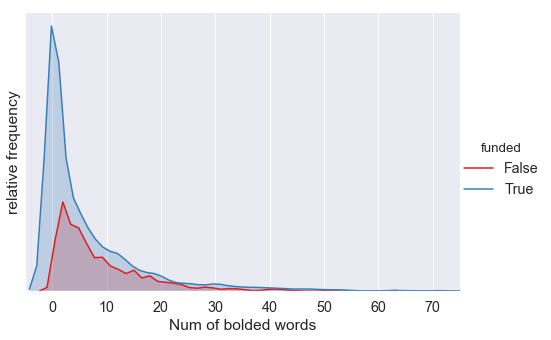

In [41]:
# Setup a FacetGrid object and facet on funded status
fig = sns.FacetGrid(final_df, hue='funded', size=5, palette='Set1', aspect=1.4)

# Plot a kde plot for # of sentences
fig.map(sns.kdeplot, 'num_bolded', shade=True).set(xlim=(-5, 75), xlabel='Num of bolded words',
        yticks=[],
        ylabel='relative frequency').add_legend()

**Variable num_imp_words**

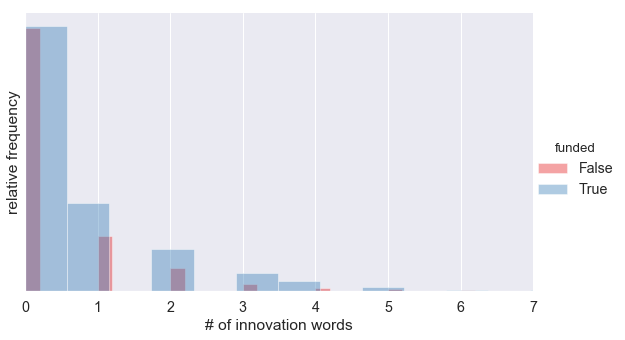

In [42]:
# Setup FacetGrid object and facet on funded status
fig = sns.FacetGrid(final_df, hue='funded', size=5, palette='Set1', aspect=1.615)

# Plot a kde plot for # of innovation words
fig.map(sns.distplot, 'num_imp_words', kde=False) \
    .set(
        xlim=(0, 7),
        xlabel='# of innovation words',
        yticks=[],
        ylabel='relative frequency'
    ).add_legend()

**Variable 'num_youtubes'**

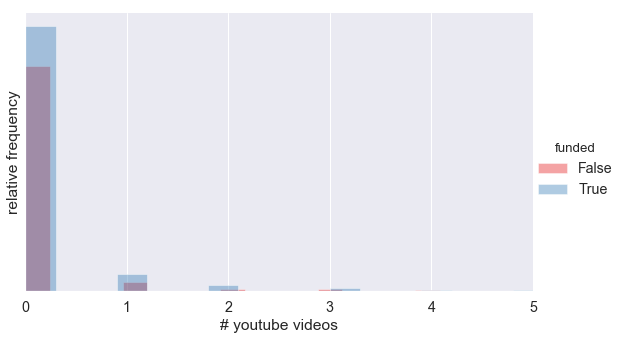

In [43]:
# Setup FacetGrid object and facet on funded status
fig = sns.FacetGrid(final_df, hue='funded', size=5, palette='Set1', aspect=1.615)

# Plot a kde plot for # of innovation words
fig.map(sns.distplot, 'num_youtubes', kde=False) \
    .set(
        xlim=(0, 5),
        xlabel='# youtube videos',
        yticks=[],
        ylabel='relative frequency'
    ).add_legend()